# Part 3: Handwriting recognition


In [1]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/data"

Mounted at /content/drive


## Import Library and Data
I use the line images previously obtained thanks to the segmentation of the paragraph

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import os
import zipfile

import re
import cv2

from heapq import heappush, heappop
from PIL import Image

In [3]:
zip_file_name_b = 'drive/MyDrive/colab/lines_images_b_1.zip'
zip_file_name = 'drive/MyDrive/colab/lines_images_1.zip'

base_path = "extracted_files/"
base_path_b = "extracted_files_b/"

In [4]:
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files/')

with zipfile.ZipFile(zip_file_name_b, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files_b/')

In [5]:
folder_path = base_path
folder_path_b = base_path_b
lines_list = []
lines_list_b = []

# Check if the folder exists
if os.path.exists(folder_path):
    folders = sorted(next(os.walk(folder_path))[1])  # Get sorted list of subdirectories

    for folder in folders:
        folder_files = []
        folder_dir = os.path.join(folder_path, folder)

        # Collect files in the folder and sort them
        folder_files = sorted([os.path.join(folder_dir, file) for file in os.listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file))])

        lines_list.append(folder_files)

else:
    print(f"The folder '{folder_path}' does not exist.")


# Check if the folder exists
if os.path.exists(folder_path_b):
    folders = sorted(next(os.walk(folder_path_b))[1])  # Get sorted list of subdirectories

    for folder in folders:
        folder_files_b = []
        folder_dir = os.path.join(folder_path_b, folder)

        # Collect files in the folder and sort them
        folder_files_b = sorted([os.path.join(folder_dir, file) for file in os.listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file))])

        lines_list_b.append(folder_files_b)

else:
    print(f"The folder '{folder_path_b}' does not exist.")

In [6]:
print(len(lines_list))
print(len(lines_list_b))

99
99


### Update
I have an error, the line are not in the right order.

In [7]:
def extract_number(filename):
    return int(filename.split('_')[-1].split('.')[0])

In [8]:
sorted_region_lines_real = []
sorted_region_lines_test = []

for line in lines_list_b:
  sorted_files = sorted(line, key=extract_number)
  sorted_region_lines_real.append(sorted_files)


for line in lines_list:
  sorted_files = sorted(line, key=extract_number)
  sorted_region_lines_test.append(sorted_files)

In [9]:
sorted_region_lines_test[0]

['extracted_files/segmented_images_0/extracted_region_1.png',
 'extracted_files/segmented_images_0/extracted_region_2.png',
 'extracted_files/segmented_images_0/extracted_region_3.png',
 'extracted_files/segmented_images_0/extracted_region_4.png',
 'extracted_files/segmented_images_0/extracted_region_5.png',
 'extracted_files/segmented_images_0/extracted_region_6.png',
 'extracted_files/segmented_images_0/extracted_region_7.png',
 'extracted_files/segmented_images_0/extracted_region_8.png',
 'extracted_files/segmented_images_0/extracted_region_9.png',
 'extracted_files/segmented_images_0/extracted_region_10.png']

Sort segmented image

In [10]:
def extract_values_from_array(input_list):
    extracted_values = [int(sub_array[0].split('/')[1].split('_')[2]) for sub_array in input_list]
    return extracted_values

In [11]:
extract_value_test = extract_values_from_array(sorted_region_lines_test)
extract_value_real = extract_values_from_array(sorted_region_lines_real)

In [12]:
print(extract_value_test[:5])
print(extract_value_real[:5])

[0, 1, 10, 11, 12]
[0, 1, 10, 11, 12]


In [13]:
# Pair each element in array_list with its corresponding value from extract_values
paired_list_test = list(zip(sorted_region_lines_test, extract_value_test))

sorted_pairs_test = sorted(paired_list_test, key=lambda x: x[1])
sorted_array_list_test = [pair[0] for pair in sorted_pairs_test]

sorted_array_list_test[:5]

[['extracted_files/segmented_images_0/extracted_region_1.png',
  'extracted_files/segmented_images_0/extracted_region_2.png',
  'extracted_files/segmented_images_0/extracted_region_3.png',
  'extracted_files/segmented_images_0/extracted_region_4.png',
  'extracted_files/segmented_images_0/extracted_region_5.png',
  'extracted_files/segmented_images_0/extracted_region_6.png',
  'extracted_files/segmented_images_0/extracted_region_7.png',
  'extracted_files/segmented_images_0/extracted_region_8.png',
  'extracted_files/segmented_images_0/extracted_region_9.png',
  'extracted_files/segmented_images_0/extracted_region_10.png'],
 ['extracted_files/segmented_images_1/extracted_region_1.png',
  'extracted_files/segmented_images_1/extracted_region_2.png',
  'extracted_files/segmented_images_1/extracted_region_3.png',
  'extracted_files/segmented_images_1/extracted_region_4.png',
  'extracted_files/segmented_images_1/extracted_region_5.png',
  'extracted_files/segmented_images_1/extracted_regio

In [14]:
# Pair each element in array_list with its corresponding value from extract_values
paired_list_real = list(zip(sorted_region_lines_real, extract_value_real))

sorted_pairs_real = sorted(paired_list_real, key=lambda x: x[1])
sorted_array_list_real = [pair[0] for pair in sorted_pairs_real]

sorted_array_list_real[:5]

[['extracted_files_b/segmented_images_0/extracted_region_1.png',
  'extracted_files_b/segmented_images_0/extracted_region_2.png',
  'extracted_files_b/segmented_images_0/extracted_region_3.png',
  'extracted_files_b/segmented_images_0/extracted_region_4.png',
  'extracted_files_b/segmented_images_0/extracted_region_5.png'],
 ['extracted_files_b/segmented_images_1/extracted_region_1.png',
  'extracted_files_b/segmented_images_1/extracted_region_2.png',
  'extracted_files_b/segmented_images_1/extracted_region_3.png',
  'extracted_files_b/segmented_images_1/extracted_region_4.png',
  'extracted_files_b/segmented_images_1/extracted_region_5.png'],
 ['extracted_files_b/segmented_images_2/extracted_region_1.png',
  'extracted_files_b/segmented_images_2/extracted_region_2.png',
  'extracted_files_b/segmented_images_2/extracted_region_3.png',
  'extracted_files_b/segmented_images_2/extracted_region_4.png',
  'extracted_files_b/segmented_images_2/extracted_region_5.png'],
 ['extracted_files_b/s

In [15]:
del sorted_array_list_test[19][9]

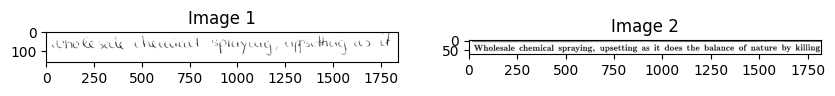

In [16]:
# Load the grayscale image
image1 = cv2.imread(sorted_array_list_test[0][0], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(sorted_array_list_real[0][0], cv2.IMREAD_GRAYSCALE)

# Display the original and binary images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')

plt.show()

## OCR

In [17]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# Load the model_1
processor_1 = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model_1 = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')

# Load the model_2
processor_2 = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model_2 = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [18]:
generated_text_list_1 = []

for line_img in sorted_array_list_test[0]:

  image = Image.open(line_img).convert("RGB")
  pixel_values = processor_1(images=image, return_tensors="pt").pixel_values

  # Generate text from the image
  generated_ids = model_1.generate(pixel_values)
  generated_text = processor_1.batch_decode(generated_ids, skip_special_tokens=True)[0]

  generated_text_list_1.append(generated_text)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [19]:
generated_text_list_1

['Wholesate chemical spraying, upsetting as it',
 'does the balance of nature by killing both pests',
 'and predators, is renewed with concern by a',
 'number of American State Research Stations. Not',
 'content with issuing bulletins on the dangers.',
 'of the misuse of chemicals in agriculture,',
 'some stations are carrying out useful research on',
 'pest control by biological means. Both native and',
 'imported predatory insects and insect pathogens.',
 'are used in field that tests.']

In [20]:
generated_text_list_2 = []

for line_img in sorted_array_list_test[0]:

  image = Image.open(line_img).convert("RGB")

  pixel_values = processor_2(images=image, return_tensors="pt").pixel_values

  # Generate text from the image
  generated_ids = model_2.generate(pixel_values)
  generated_text = processor_2.batch_decode(generated_ids, skip_special_tokens=True)[0]

  generated_text_list_2.append(generated_text)

In [21]:
generated_text_list_2

['wholesale chemical spraying, upsetting as it',
 'does the balance of nature by killing both pests',
 'and predators, is moved with cancer by a "',
 'number of American State Research Stations. Not',
 'content with issuing bulletins on the dangers',
 'of the misuse of chemicals in agriculture,',
 'some stations are carrying out useful research on',
 'pest control by biological means. Both native and',
 "imported predatory insect's and insect pathogens.",
 'are used in field that tests.']

In [22]:
paragraphe_test_1 = generated_text_string = ' '.join(generated_text_list_1)
paragraphe_test_2 = generated_text_string = ' '.join(generated_text_list_2)

print(paragraphe_test_1)
print(paragraphe_test_2)

Wholesate chemical spraying, upsetting as it does the balance of nature by killing both pests and predators, is renewed with concern by a number of American State Research Stations. Not content with issuing bulletins on the dangers. of the misuse of chemicals in agriculture, some stations are carrying out useful research on pest control by biological means. Both native and imported predatory insects and insect pathogens. are used in field that tests.
wholesale chemical spraying, upsetting as it does the balance of nature by killing both pests and predators, is moved with cancer by a " number of American State Research Stations. Not content with issuing bulletins on the dangers of the misuse of chemicals in agriculture, some stations are carrying out useful research on pest control by biological means. Both native and imported predatory insect's and insect pathogens. are used in field that tests.


I will use the model trocr large handwritten since it's look to have better result.

In [23]:
generated_text_list_real_1 = []

for line_img in sorted_array_list_real[0]:

  image = Image.open(line_img).convert("RGB")

  pixel_values = processor_1(images=image, return_tensors="pt").pixel_values

  # Generate text from the image
  generated_ids = model_1.generate(pixel_values)
  generated_text = processor_1.batch_decode(generated_ids, skip_special_tokens=True)[0]

  generated_text_list_real_1.append(generated_text)

In [24]:
generated_text_list_real_1

['Wholesale chemical spraying as it does the balance of nature by killing',
 'both pests and predators, is viewed with concern by a number of American State',
 'Research Stations. Not content with issuing bulletins on the dangers of the misuse of',
 'chemicals in agriculture, some stations are carrying out useful research on pest control',
 'by biological means. Both native and imported predatory insects and insect pathogens']

In [25]:
paragraphe_real = generated_text_string = ' '.join(generated_text_list_real_1)

In [26]:
print(paragraphe_real)
print(paragraphe_test_1)
print(paragraphe_test_2)

Wholesale chemical spraying as it does the balance of nature by killing both pests and predators, is viewed with concern by a number of American State Research Stations. Not content with issuing bulletins on the dangers of the misuse of chemicals in agriculture, some stations are carrying out useful research on pest control by biological means. Both native and imported predatory insects and insect pathogens
Wholesate chemical spraying, upsetting as it does the balance of nature by killing both pests and predators, is renewed with concern by a number of American State Research Stations. Not content with issuing bulletins on the dangers. of the misuse of chemicals in agriculture, some stations are carrying out useful research on pest control by biological means. Both native and imported predatory insects and insect pathogens. are used in field that tests.
wholesale chemical spraying, upsetting as it does the balance of nature by killing both pests and predators, is moved with cancer by a

In [27]:
from difflib import SequenceMatcher

# Calculate the similarity ratio
similarity_ratio_1 = SequenceMatcher(None, paragraphe_test_1, paragraphe_test_2).ratio()
similarity_ratio_2 = SequenceMatcher(None, paragraphe_test_1, paragraphe_real).ratio()
similarity_ratio_3 = SequenceMatcher(None, paragraphe_test_2, paragraphe_real).ratio()

print(f"Similarity Ratio model_1 / model_2: {similarity_ratio_1 * 100:.2f}%")
print(f"Similarity Ratio model_1 / real: {similarity_ratio_2 * 100:.2f}%")
print(f"Similarity Ratio model_2 / real: {similarity_ratio_3 * 100:.2f}%")

Similarity Ratio model_1 / model_2: 26.46%
Similarity Ratio model_1 / real: 19.21%
Similarity Ratio model_2 / real: 1.39%


## Generalization

Handwritting part (test)

In [29]:
paragraphe_test = []

for lines_list_paragraphe in sorted_array_list_test:
    generated_text_list = []

    for line_img in lines_list_paragraphe:
        image = Image.open(line_img).convert("RGB")

        pixel_values = processor_2(images=image, return_tensors="pt").pixel_values

        # Generate text from the image
        generated_ids = model_2.generate(pixel_values)
        generated_text = processor_2.batch_decode(generated_ids, skip_special_tokens=True)[0]

        generated_text_list.append(generated_text)

    paragraphe_test.append(generated_text_list)

In [30]:
len(paragraphe_test)

99

In [31]:
paragraphe_test[:2]

[['wholesale chemical spraying, upsetting as it',
  'does the balance of nature by killing both pests',
  'and predators, is moved with cancer by a "',
  'number of American State Research Stations. Not',
  'content with issuing bulletins on the dangers',
  'of the misuse of chemicals in agriculture,',
  'some stations are carrying out useful research on',
  'pest control by biological means. Both native and',
  "imported predatory insect's and insect pathogens.",
  'are used in field that tests.'],
 ['In that case, he reverted to French, I shall be obliged',
  'to lift you from the coach. Without answering him, she',
  'rose, and bending over the agitated girl, said softly :',
  'No one with them you, Lucia Remain here. Ignoring his',
  'proffered hand, she stepped from she vebucke. Will you',
  "he's good as to order you men not to molesting",
  'ment she said coldly to Orsini.']]

In [32]:
import json

# Define the path to save the JSON file in your Google Drive
file_path = '/content/drive/My Drive/colab/paragraphe_test_3.json'

# Saving paragraphe_test to a JSON file in your Google Drive
with open(file_path, 'w') as file:
    json.dump(paragraphe_test, file)

Computer part (reel)

In [ ]:
paragraphe_real = []

for lines_list_paragraphe in sorted_array_list_real:
    generated_text_list = []

    for line_img in lines_list_paragraphe:
        image = Image.open(line_img).convert("RGB")

        pixel_values = processor_2(images=image, return_tensors="pt").pixel_values

        # Generate text from the image
        generated_ids = model_2.generate(pixel_values)
        generated_text = processor_2.batch_decode(generated_ids, skip_special_tokens=True)[0]

        generated_text_list.append(generated_text)

    paragraphe_real.append(generated_text_list)

In [ ]:
import json

# Define the path to save the JSON file in your Google Drive
file_path = '/content/drive/My Drive/colab/paragraphe_real_3.json'

# Saving paragraphe_test to a JSON file in your Google Drive
with open(file_path, 'w') as file:
    json.dump(paragraphe_real, file)